In [2]:
%matplotlib inline

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('bestsellers with categories.csv')

# Display the first five rows
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [4]:
df.shape

(550, 7)

Набір даних містить 550 книг з 7 змінними (стовпчиками) для кожної книги.

Дайте відповідь: Скільки книг містить набір даних?
Набір даних містить 550 книг.



In [5]:

df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
df.head()


,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


# Первинне дослідження даних

### 1. Перевіре, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців

In [6]:
missing_values = df.isna().sum()
missing_values

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

### Відповідь
1. Немає пропущених даних

### 2. Перевірте, які є унікальні значення в колонці `genre`

In [7]:
unique_genres = df["genre"].unique()
unique_genres

array(['Non Fiction', 'Fiction'], dtype=object)

### Відповідь
2. Є два унікальні жанри: Non Fiction, Fiction

### 3. Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')


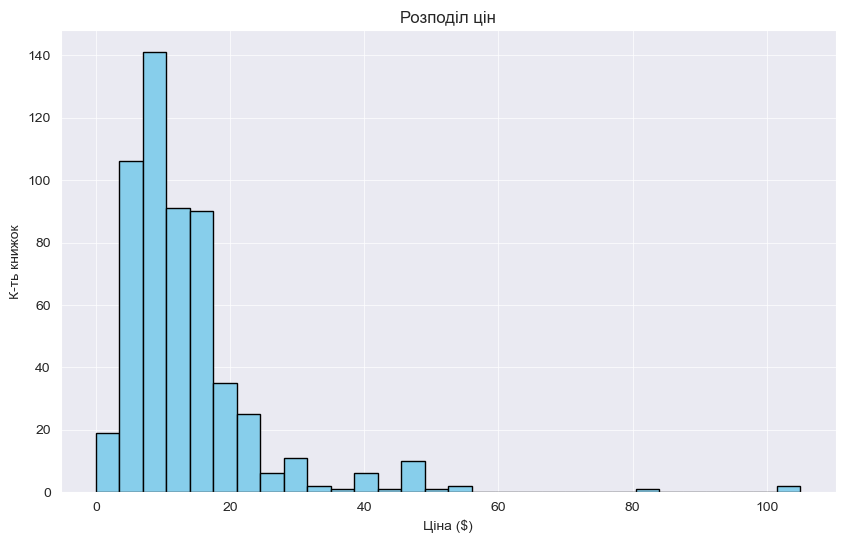

In [8]:
plt.figure(figsize=(10,6))
df["price"].plot(kind="hist", bins=30, edgecolor="black", color="skyblue")
plt.title("Розподіл цін")
plt.xlabel("Ціна ($)")
plt.ylabel("К-ть книжок")
plt.grid(True, which="both", linewidth=0.5)
plt.show()

### 4. Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна

In [9]:
max_price = df['price'].max()
min_price = df['price'].min()
mean_price = df['price'].mean()
median_price = df['price'].median()

max_price, min_price, mean_price, median_price

(105, 0, 13.1, 11.0)

### Відповідь

 4.1 Максимальна ціна?
    105
 4.2. Мінімальна ціна?
    0
 4.3. Середня ціна?
    13,1
 4.4 Медіанна ціна?
    11,0

# Пошук та сортування даних

### 1. Який рейтинг у датасеті найвищий?

In [10]:
highest_rating = df['user_rating'].max()
print(f"Відповідь: {highest_rating}")

Відповідь: 4.9


### 2.  Скільки книг мають такий рейтинг?

In [11]:
books_HR = df[df['user_rating'] == highest_rating].shape[0]
print(f"Відповідь: {books_HR}")

Відповідь: 52


### 3. Яка книга має найбільше відгуків?

In [12]:
book_MR = df[df['reviews'] == df['reviews'].max()]['name'].iloc[0]
print(f"Відповідь: Це книга - '{book_MR}'")

Відповідь: Це книга - 'Where the Crawdads Sing'


### 4.  З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча

In [13]:
most_expensive_book_2015 = df[df["year"] == 2015].sort_values(by="price", ascending=False).iloc[0]["name"]
print(f"Відповідь: Це книга - '{most_expensive_book_2015}'")

Відповідь: Це книга - 'Publication Manual of the American Psychological Association, 6th Edition'


### 5. Cкільки книг жанру Fiction потрапили до Топ-50 у 2010 році


In [14]:
answer = df[(df['year'] == 2010) & (df['genre'] == 'Fiction')].shape[0]
print(f"Відповідь: {answer} книг.")

Відповідь: 20 книг.


### 6. Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках

In [15]:
answer6 = df[(df['user_rating'] == 4.9) & (df['year'].isin((2010, 2011)))].shape[0]
print(f"Відповідь: {answer6} книг.")

Відповідь: 1 книг.


### 7. Давайте відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів.  Яка книга остання у відсортованому списку?

In [16]:
answer7 = df[(df['year'] == 2015) & (df['price'] < 8)].sort_values(by='price').iloc[-1]['name']
print(f"Відповідь: Остання книга у списку - '{answer7}'")

Відповідь: Остання книга у списку - 'Old School (Diary of a Wimpy Kid #10)'


# Агрегування даних та з'єднання таблиць

### 1. Для початку давайте подивимося на максимальну та мінімальну ціни для кожного з жанрів (використовуйте функції groupby та agg, для підрахунку мінімальних та максимальних значень використовуйте max та min). Не беріть усі стовпці, виберіть тільки потрібні вам

In [17]:
answer3_1 = df.groupby('genre')['price'].agg(['min', 'max'])
print(f"Відповідь:\n{answer3_1}")

Відповідь:
             min  max
genre                
Fiction        0   82
Non Fiction    0  105


### 2. Тепер створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів (використовуйте функції groupby та agg, для підрахунку кількості використовуйте count). Не беріть усі стовпці, виберете тільки потрібні

In [18]:
answer3_2 = df.groupby('author')['name'].agg(['count'])
q_ty_by_author = answer3_2.sort_values(by="count", ascending=False).iloc[0]
print(f'Якої розмірності вийшла таблиця?\nВідповідь: {answer3_2.shape}\n')
print(f'Який автор має найбільше книг?\nВідповідь: {q_ty_by_author.name}\n')
print(f'Скільки книг цього автора?\nВідповідь: {q_ty_by_author["count"]}\n')

Якої розмірності вийшла таблиця?
Відповідь: (248, 1)

Який автор має найбільше книг?
Відповідь: Jeff Kinney

Скільки книг цього автора?
Відповідь: 12



### 3. Тепер створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора (використовуйте функції groupby та agg, для підрахунку середнього значення використовуйте mean). Не беріть усі стовпці, виберете тільки потрібні

In [19]:
answer3_3 = df.groupby('author')['user_rating'].agg(['mean'])
lowest_avg_rating_author = answer3_3.sort_values(by='mean').iloc[0]
print(f'У якого автора середній рейтинг мінімальний?\nВідповідь: {lowest_avg_rating_author.name}\n')
print(f'Який у цього автора середній рейтинг?\nВідповідь: {lowest_avg_rating_author["mean"]}')

У якого автора середній рейтинг мінімальний?
Відповідь: Donna Tartt

Який у цього автора середній рейтинг?
Відповідь: 3.9


### 4. З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг (Використовуйте функцію concat з параметром axis=1). Збережіть результат у змінну

In [20]:
answer3_4 = pd.concat([answer3_2, answer3_3], axis=1)
answer3_4.head()

,count,mean
author,,
Abraham Verghese,2,4.6
Adam Gasiewski,1,4.4
Adam Mansbach,1,4.8
Adir Levy,1,4.8
Admiral William H. McRaven,1,4.7


### 5. Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом (використовуйте функцію sort_values)

In [21]:
answer3_5 = answer3_4.sort_values(by=['count', 'mean']).iloc[0].name
print(f'Який автор перший у списку?\nВідповідь: {answer3_5}')

Який автор перший у списку?
Відповідь: Muriel Barbery


# Стоіпчикий графік кількості книг кожного жанру

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

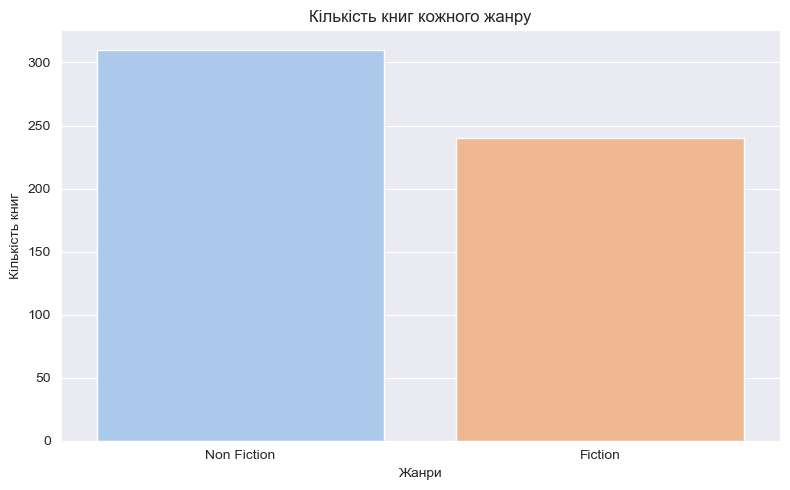

In [24]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="genre", palette="pastel")
plt.title("Кількість книг кожного жанру")
plt.xlabel("Жанри")
plt.ylabel("Кількість книг")
plt.tight_layout()
plt.show()

# Точкова діаграма оглядів (відгуків) vs. рейтинг користувачів

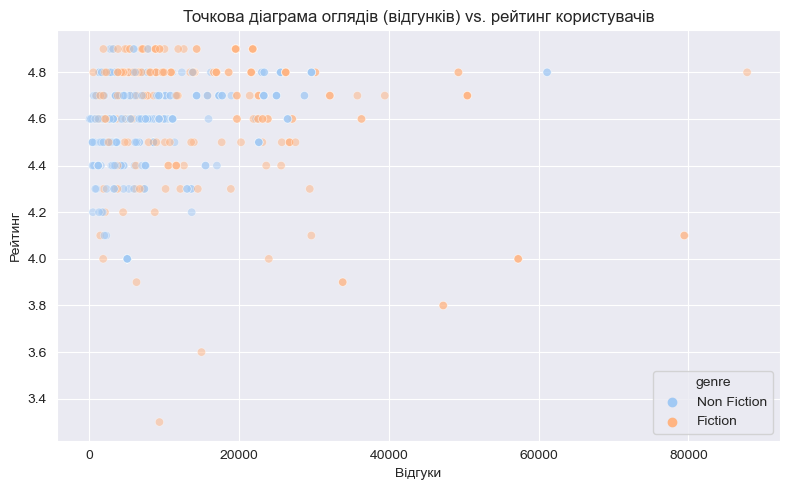

In [37]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="reviews", y="user_rating", hue="genre", palette='pastel', alpha=0.5)
plt.title("Точкова діаграма оглядів (відгунків) vs. рейтинг користувачів")
plt.xlabel("Відгуки")
plt.ylabel("Рейтинг")
plt.tight_layout()
plt.show()

# Розподіл оглядів (відгуків)

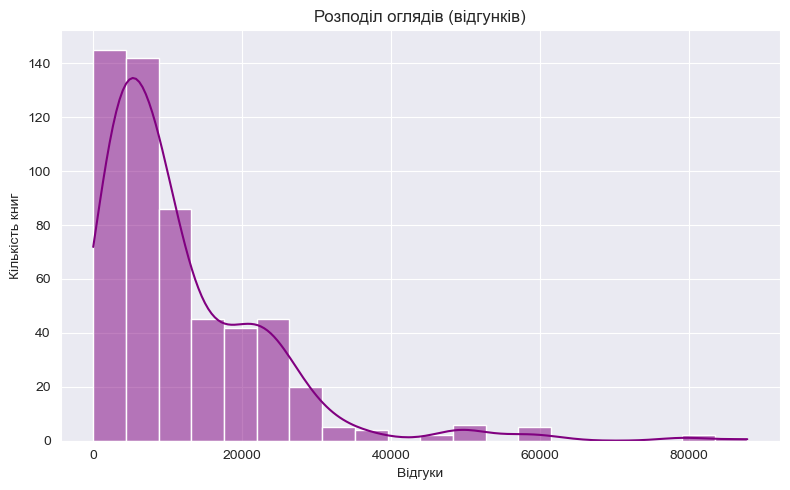

In [39]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='reviews', kde=True, color='purple', alpha=0.5, bins=20)
plt.title("Розподіл оглядів (відгунків)")
plt.xlabel("Відгуки")
plt.ylabel("Кількість книг")
plt.tight_layout()
plt.show()